In [ ]:
import cv2
from matplotlib import pyplot as plt
from skimage.util import random_noise
import numpy as np

In [ ]:
img = cv2.imread("lena.png")
gray = cv2.imread("lena.png",0)

In [ ]:
#Salt and Pepper
def sp(n):
    noise_img=random_noise(gray,mode='s&p',amount=n)
    noise_img=np.array(255*noise_img,dtype='uint8')
    cv2.imwrite('sp_42049.png',noise_img)

    return noise_img


In [1]:
a1=sp(0.1)
a2=sp(0.2)
a3=sp(0.3)
a4=sp(0.4)
a5=sp(0.5)
a6=sp(0.6)
a7=sp(0.7)
a8=sp(0.8)
a9=sp(0.9)
a10=sp(1)

img1=[a1,a2]
img2=[a3,a4]
img3=[a5,a6]
img4=[a7,a8]
img5=[a9,a10]



In [ ]:
def show_img(img):
    cv2.imshow('noise',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img1[i],'gray')

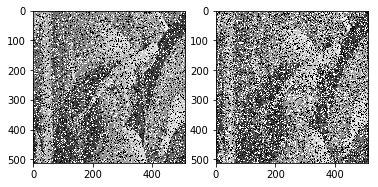

In [2]:
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img2[i],'gray')

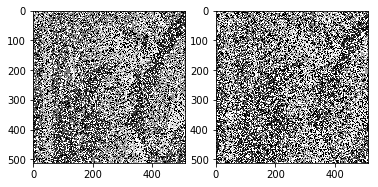

In [3]:
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img3[i],'gray')

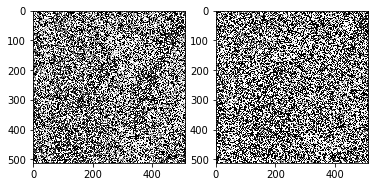

In [4]:
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img4[i],'gray')

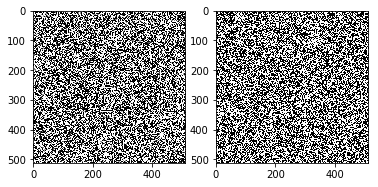

In [5]:
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img5[i],'gray')

#### Filter 3x3

In [6]:
# print(a1)
print(a1.shape)
f1=np.zeros([3,3])
f1.fill(1/9)
print("f1 is :\n ",f1)
f1_new=np.zeros([a1.shape[0]+f1.shape[0]-1,a1.shape[1]+f1.shape[1]-1])#new matrix of size m+a-1 and n+b-1
print(f1_new.shape)
n1=np.insert(a1, 0, 0, axis = 1)
n1=np.insert(n1, 0, 0, axis = 0)
n1=np.insert(n1, 513, 0, axis = 1)
# n1=np.insert(n1,1,0,axis=1)
n1=np.insert(n1,513,0,axis=0)
# n1=np.insert(n1,1,0,axis=0)
print("n1 is :\n",n1) # n1 contains the a1 matrix with extra 2 rows and cols of 0's
print(n1.shape)
cv2.imshow("n1 img",n1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512)
f1 is :
  [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
(514, 514)
n1 is :
 [[  0   0   0 ...   0   0   0]
 [  0 169 169 ... 162 138   0]
 [  0   0 169 ... 162 138   0]
 ...
 [  0  52  52 ... 118 121   0]
 [  0  52  52 ... 118 121   0]
 [  0   0   0 ...   0   0   0]]
(514, 514)


In [7]:
print("f1_new is ",f1_new)

f1_new is  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(3, 3)
[[169 169 168 ... 175 162 138]
 [  0 169 168 ... 175 162 138]
 [169   0 168 ... 175 162 138]
 ...
 [ 52  52  59 ... 115 112 113]
 [ 52  52  64 ... 117 118 121]
 [ 52  52  64 ... 117 118 121]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         18.77777778 37.55555556 ... 37.44444444 33.33333333
  15.33333333]
 [ 0.         18.77777778 56.33333333 ... 74.88888889 66.66666667
  30.66666667]
 ...
 [ 0.         11.55555556 23.11111111 ... 51.33333333 51.55555556
  26.        ]
 [ 0.         11.55555556 23.11111111 ... 52.22222222 53.11111111
  26.88888889]
 [ 0.          5.77777778 11.55555556 ... 26.11111111 26.55555556
  13.44444444]]


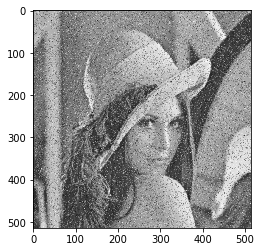

In [8]:
#correlation

print(f1.shape)
b=int((f1.shape[0]-1)/2)
a=int((f1.shape[1]-1)/2)
print(a1)
for x in range(0,a1.shape[0]+f1.shape[0]-1):
    for y in range(0,a1.shape[1]+f1.shape[1]-1):
#         print("inside y")
#         f1_new[x,y]=0
        for j in range(-1*b,b):
            for i in range(-1*a,a):
                
                f1_new[x,y]+=np.multiply(n1[x+i,y+j],f1[i,j])
#                 print(f1_new[x,y])
print(f1_new)
# cv2.imshow('pls work',f1_new)
# print('hi')
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(f1_new,'gray')
plt.show()


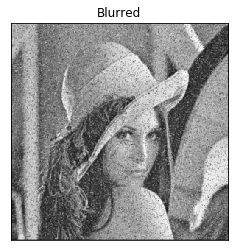

In [9]:
#Using inbuilt function
blur = cv2.blur(n1,(3,3))
plt.imshow(blur,'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Average Filter 5x5

In [10]:
print(a1.shape)
f2=np.zeros([5,5])
f2.fill(1/25)
print("f2 is :\n ",f2)
f2_new=np.zeros([a1.shape[0]+f2.shape[0]-1,a1.shape[1]+f2.shape[1]-1])#new matrix of size m+a-1 and n+b-1
print(f2_new.shape)
n1=np.insert(a1, 0, 0, axis = 1)
n1=np.insert(n1,0,0,axis=0)
n1=np.insert(n1, 1, 0, axis = 1)
n1=np.insert(n1,1,0,axis=0)
n1=np.insert(n1,514,0,axis=1)
n1=np.insert(n1,515,0,axis=1)
n1=np.insert(n1, 514, 0, axis = 0)
n1=np.insert(n1,515,0,axis=0)

print("n1 is :\n",n1) # n1 contains the a1 matrix with extra 2 rows and cols of 0's
print(n1.shape)
cv2.imshow("n1 img",n1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512)
f2 is :
  [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
(516, 516)
n1 is :
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 169 ... 138   0   0]
 ...
 [  0   0  52 ... 121   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
(516, 516)


[[169 169 168 ... 175 162 138]
 [  0 169 168 ... 175 162 138]
 [169   0 168 ... 175 162 138]
 ...
 [ 52  52  59 ... 115 112 113]
 [ 52  52  64 ... 117 118 121]
 [ 52  52  64 ... 117 118 121]]
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    6.76 13.52 ... 19.   12.    0.  ]
 [ 0.    6.76 20.28 ... 38.   24.    0.  ]
 ...
 [ 0.    6.24 12.48 ... 42.08 28.12  0.  ]
 [ 0.    4.16  8.32 ... 28.48 19.12  0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]


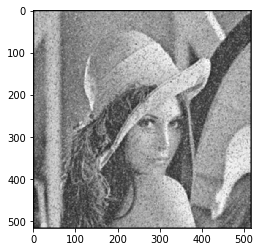

In [11]:
b=int((f2.shape[0]-1)/2)
a=int((f2.shape[1]-1)/2)
print(a1)
for x in range(0,a1.shape[0]+f2.shape[0]-2):
    for y in range(0,a1.shape[1]+f2.shape[1]-2):
#         print("inside y")
#         f1_new[x,y]=0
        for j in range(-1*b,b):
            for i in range(-1*a,a):
                
                f2_new[x,y]+=np.multiply(n1[x+i,y+j],f2[i,j])
#                 print(f1_new[x,y])
print(f2_new)
# cv2.imshow('pls work',f1_new)
# print('hi')
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(f2_new,'gray')
plt.show()

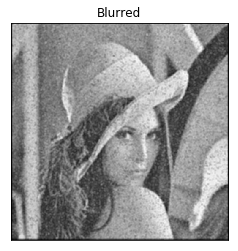

In [12]:
#Using inbuilt function
blur = cv2.blur(n1,(5,5))
plt.imshow(blur,'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Average filter 7x7

In [13]:
print(a1.shape)
f2=np.zeros([7,7])
f2.fill(1/49)
print("f2 is :\n ",f2)
f2_new=np.zeros([a1.shape[0]+f2.shape[0]-1,a1.shape[1]+f2.shape[1]-1])#new matrix of size m+a-1 and n+b-1
print(f2_new.shape)
n1=np.insert(a1, 0, 0, axis = 1)
n1=np.insert(n1,0,0,axis=0)
n1=np.insert(n1, 1, 0, axis = 1)
n1=np.insert(n1,1,0,axis=0)
n1=np.insert(n1,0,0,axis=1)
n1=np.insert(n1,513,0,axis=0)
n1=np.insert(n1,514,0,axis=1)
n1=np.insert(n1,515,0,axis=1)
n1=np.insert(n1, 514, 0, axis = 0)
n1=np.insert(n1,515,0,axis=0)
n1=np.insert(n1,516,0,axis=0)
n1=np.insert(n1,517,0,axis=1)
print("n1 is :\n",n1) # n1 contains the a1 matrix with extra 2 rows and cols of 0's
print(n1.shape)
cv2.imshow("n1 img",n1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512)
f2 is :
  [[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]
(518, 518)
n1 is :
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 138   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 121   0]]
(518, 518)


[[169 169 168 ... 175 162 138]
 [  0 169 168 ... 175 162 138]
 [169   0 168 ... 175 162 138]
 ...
 [ 52  52  59 ... 115 112 113]
 [ 52  52  64 ... 117 118 121]
 [ 52  52  64 ... 117 118 121]]
[[ 5.28571429  9.79591837  9.02040816 ... 16.95918367  0.
   0.        ]
 [ 8.10204082 12.6122449  12.46938776 ... 26.65306122  0.
   0.        ]
 [10.91836735 18.87755102 15.91836735 ... 36.34693878  0.
   0.        ]
 ...
 [ 4.93877551  7.06122449  4.24489796 ... 14.53061224  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


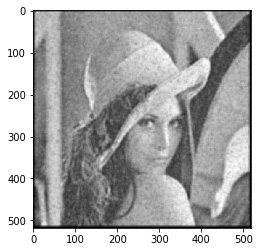

In [14]:
f2_new=np.zeros([a1.shape[0]+f2.shape[0]-1,a1.shape[1]+f2.shape[1]-1])#new matrix of size m+a-1 and n+b-1
b=int((f2.shape[0]-1)/2)
a=int((f2.shape[1]-1)/2)
print(a1)
for x in range(0,a1.shape[0]+f2.shape[0]-3):
    for y in range(0,a1.shape[1]+f2.shape[1]-3):
        for j in range(-1*b,b):
            for i in range(-1*a,a):
                
                f2_new[x,y]+=np.multiply(n1[x+i,y+j],f2[i,j])
#                 print(f1_new[x,y])
print(f2_new)
plt.imshow(f2_new,'gray')
plt.show()

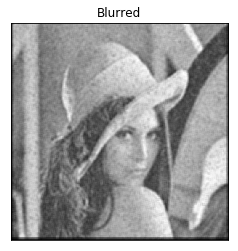

In [15]:
#Using inbuilt function
blur = cv2.blur(n1,(7,7))
plt.imshow(blur,'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Median Filter

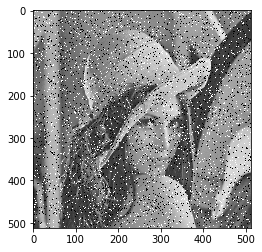

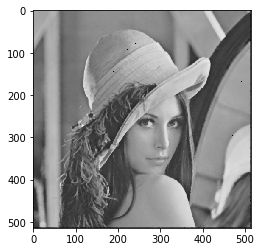

In [16]:
#Median filter
f2_new=f1_new
# f2_new=a1
plt.imshow(a1,'gray')
plt.show()
li=[]
x=a1
a1=x
for i in range(511):
    for j in range(511):
        if(i!=0 and j!=0 and i!=511 and j!=511):
            li=[a1[i-1,j-1],a1[i-1,j],a1[i-1,j+1],a1[i,j-1],a1[i,j],a1[i,j+1],a1[i+1,j-1],a1[i+1,j],a1[i+1,j+1]]
            li=(sorted(li))
#             print("edian is :",li[int(len(li)/2)])
            f2_new[i,j]=li[int(len(li)/2)]
        elif(i==0 and j==0):
            li=[a1[i,j],a1[i,j+1],a1[i+1,j],a1[i+1,j+1]]
            li=sorted(li)
            f2_new[i,j]=li[int(len(li)/2)]
            
        elif(i==511 and j==511):
            li=[a1[i,j-1],a1[i,j],a1[i-1,j-1],a1[i-1,j]]
            li=sorted(li)
            f2_new[i,j]=li[int(len(li)/2)]
        elif(i==511 and j==0):
            li=[a1[i-1,j],a1[i-1,j+1],a1[i,j],a1[i,j+1]]
            li=sorted(li)
            f2_new[i,j]=li[int(len(li)/2)]
        elif(i==0 and j==511):
            li=[a1[i,j],a1[i,j-1],a1[i+1,j],a1[i+1,j-1]]
            li=sorted(li)
            f2_new[i,j]=li[int(len(li)/2)]
        elif(i==0 or i==511):
            li=[a1[i,j-1],a1[i,j],a1[i,j+1],a1[i+1,j-1],a1[i+1,j],a1[i+1,j+1]]
            li=sorted(li)
            f2_new[i,j]=li[int(len(li)/2)]
        elif(j==0 or j==511):
            li=[a1[i-1,j],a1[i-1,j+1],a1[i,j],a1[i,j+1],a1[i+1,j],a1[i+1,j+1]]
            li=sorted(li)
            f2_new[i,j]=li[int(len(li)/2)]
plt.imshow(f2_new,'gray')
plt.show()

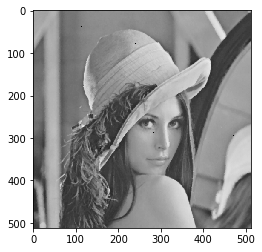

In [17]:
inbuilt=cv2.medianBlur(a1,3)
plt.imshow(inbuilt,'gray')
plt.show()